# Лабораторная работа №1
## Выполнил студент группы БВТ2204 Налтакян Карина

### Оглавление
1. [Задание 1](#Задание-№1)
2. [Задание 2](#Задание-№2)
3. [Задание 3](#Задание-№3)
4. [Вывод](#Вывод)

### Задание №1
<i> Вызвать функцию print() и передать туда строку Hello, World! </i>

In [1]:
print("Hello,world!")

Hello,world!


### Задание №2
Написать генератор случайных матриц(многомерных), который принимает
опциональные параметры <b>m</b>, <b>n</b>, <b>min_limit</b>, <b>max_limit</b>, где <b>m</b> и <b>n</b> указывают размер
матрицы, а <b>min_lim</b> и <b>max_lim</b> - минимальное и максимальное значение для
генерируемого числа.

In [49]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

In [50]:
user_m = int(input())
user_n = int(input())
user_min_limit = int(input())
user_max_limit = int(input())

def matrix_generate(user_m, user_n, user_min_limit, user_max_limit): 
    matrix = np.random.randint(user_min_limit, user_max_limit, size=(user_m, user_n)) 
    return matrix 

matrix = matrix_generate(user_m, user_n, user_min_limit, user_max_limit)
print(matrix)
    

 2
 6
 10
 100


[[61 57 98 26 30 95]
 [40 78 24 99 73 50]]


### Задание №3
Реализовать методы сортировки строк числовой матрицы в соответствии с
заданием. Оценить время работы каждого алгоритма сортировки и сравнить его со
временем стандартной функции сортировки. Испытания проводить на сгенерированных
матрицах.

In [8]:
import copy

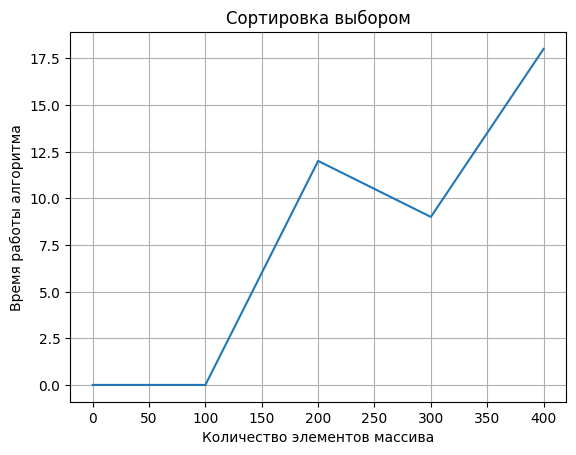

(array([[26, 30, 57, 61, 95, 98],
       [24, 40, 50, 73, 78, 99]]), '--- 0 ms ---')


In [61]:
# Сортировка выбором.
# Берётся срез массива, в котором минимальный элемент переносят в самый левый угол,
# после чего срез уменьшается и цикл повторяется.
list1 = copy.deepcopy(matrix)


def sort_selection(list1):
    start_time = time.time()
    for row in list1:
        for i in range(len(row)-1):
            srez = row[i:]
            mi = min(srez)
            mii = np.where(srez == mi)[0]
            srez[0],srez[mii] = mi, srez[0]
            time_work = ("--- {0} ms ---".format(round((time.time() - start_time)*1000)))
    return list1, time_work


x = []
y = []

for n in range(0, 500, 100):
    row = np.random.randint(0, 1000, size=n)
    time_work_sum = 0
    for i in range(len(row) - 1):
        start_time = time.time()
        srez = row[i:]
        mi = min(srez)
        mii = np.where(srez == mi)[0]
        srez[0], srez[mii] = mi, srez[0]
        time_work_sum += round((time.time() - start_time) * 1000)
    
    x.append(n)
    y.append(time_work_sum)

plt.title('Сортировка выбором')
plt.xlabel('Количество элементов массива')
plt.ylabel('Время работы алгоритма')
plt.grid(True)
plt.plot(x, y)
plt.show()
    
print(sort_selection(list1))

(array([[26, 30, 57, 61, 95, 98],
       [24, 40, 50, 73, 78, 99]]), '--- 0 ms ---')


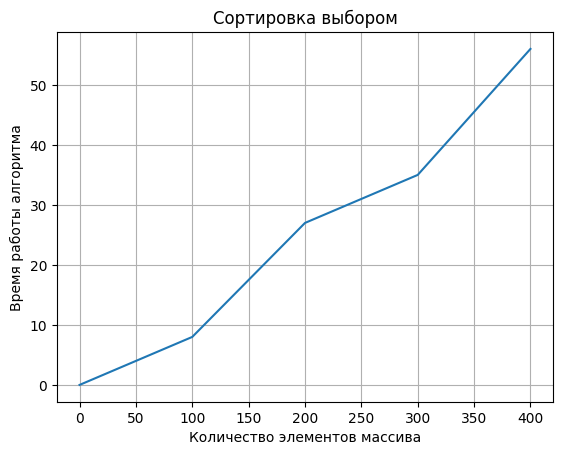

In [62]:
# Сортировка вставкой

list2 = copy.deepcopy(matrix)

def insertion_sort(list2):
    start_time = time.time()
    for row in list2:
        for i in range(len(row)):
            while i > 0 and row[i] < row[i-1]:
                row[i], row[i-1] = row[i-1], row[i]
                i -= 1
    work_time = "--- {0} ms ---".format(round((time.time() - start_time)*1000))
    return list2, work_time 

print(insertion_sort(list2))

x = []
y = []

for n in range(0, 500, 100):
    row = np.random.randint(0, 1000, size=n)
    time_work_sum = 0
    for i in range(len(row)):
            start_time = time.time()
            while i > 0 and row[i] < row[i-1]:
                row[i], row[i-1] = row[i-1], row[i]
                i -= 1
            time_work_sum += round((time.time() - start_time) * 1000)
    
    x.append(n)
    y.append(time_work_sum)

plt.title('Сортировка вставкой')
plt.xlabel('Количество элементов массива')
plt.ylabel('Время работы алгоритма')
plt.grid(True)
plt.plot(x, y)
plt.show()
    


[[57 26 30 61 95 98]
 [24 40 73 50 78 99]]
--- 0 ms ---


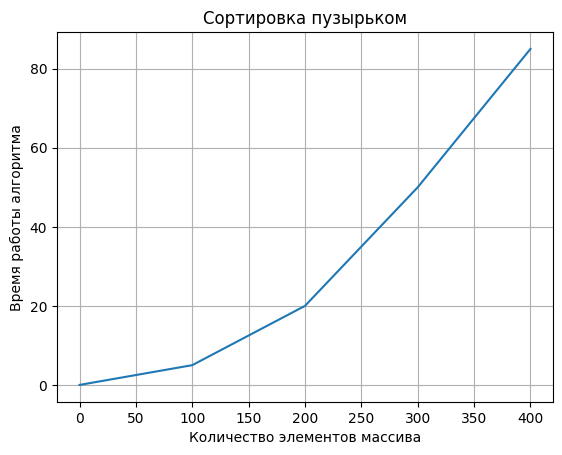

In [72]:
# Сортировка обменом. || Сортировка пузырьком.
list3 = copy.deepcopy(matrix)
start_time = time.time()
for row in range(len(list3)):
    for i in range(len(list3-1)):
        for k in range(len(list3[row]) - i - 1):
            if list3[row][k] > list3[row][k + 1]:
                list3[row][k], list3[row][k + 1] = list3[row][k + 1], list3[row][k]

print(list3)
print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

x = []
y = []

for n in range(0, 500, 100):
    row = np.random.randint(0, 1000, size=n)
    time_work_sum = 0
    start_time = time.time()
    for i in range(len(row) - 1):
        for k in range(len(row) - i - 1):
            if row[k] > row[k + 1]:
                row[k], row[k + 1] = row[k + 1], row[k]
    time_work_sum += round((time.time() - start_time) * 1000)

    x.append(n)
    y.append(time_work_sum)

plt.title('Сортировка пузырьком')
plt.xlabel('Количество элементов массива')
plt.ylabel('Время работы алгоритма')
plt.grid(True)
plt.plot(x, y)
plt.show()
            


[[26 30 61 57 95 98]
 [40 24 73 78 50 99]]
--- 0 ms ---


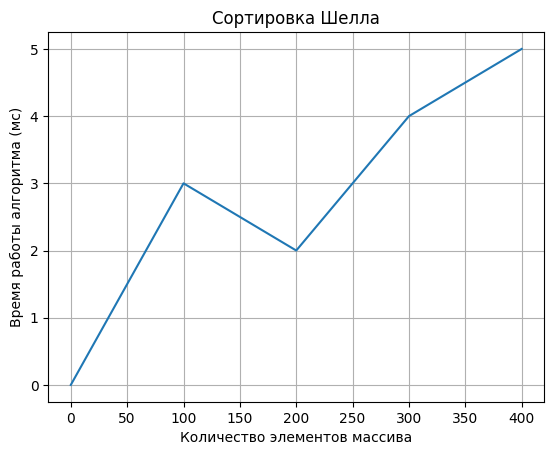

In [74]:
# Сортировка Шелла.

list4 = copy.deepcopy(matrix) 
start_time = time.time()

for i in range(user_m):
    d = user_n // 2
    while d >= 1:
        for j in range(user_n - d):
            if list4[i][j] > list4[i][j + d]:
                list4[i][j], list4[i][j + d] = list4[i][j + d], list4[i][j]
        d = d // 2
print(list4)
print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

x = []
y = []

for n in range(0, 500, 100):
    row = np.random.randint(0, 1000, size=n)
    start_time = time.time()
    
    d = len(row) // 2
    while d >= 1:
        for i in range(d, len(row)):
            temp = row[i]
            j = i
            while j >= d and row[j - d] > temp:
                row[j] = row[j - d]
                j -= d
            row[j] = temp
        d //= 2
        
    time_work = round((time.time() - start_time) * 1000)

    x.append(n)
    y.append(time_work)

plt.title('Сортировка Шелла')
plt.xlabel('Количество элементов массива')
plt.ylabel('Время работы алгоритма (мс)')
plt.grid(True)
plt.plot(x, y)
plt.show()


[[26 30 57 61 95 98]
 [24 40 50 73 78 99]]
--- 2 ms ---


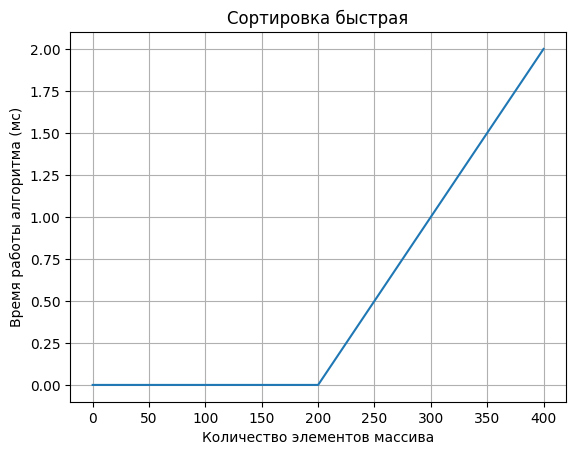

In [76]:
# Быстрая сортировка.
list5 = copy.deepcopy(matrix)
start_time = time.time()
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[0]
        less = [x for x in arr[1:] if x <= pivot]
        greater = [x for x in arr[1:] if x > pivot]
        return quick_sort(less) + [pivot] + quick_sort(greater)

for i in range(len(list5)):
    list5[i] = quick_sort(list5[i])

print(list5)
print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

x = []
y = []

for n in range(0, 500, 100):
    row = np.random.randint(0, 1000, size=n)
    start_time = time.time()
    quick_sort(row)
    time_work = round((time.time() - start_time) * 1000)

    x.append(n)
    y.append(time_work)

plt.title('Сортировка быстрая')
plt.xlabel('Количество элементов массива')
plt.ylabel('Время работы алгоритма (мс)')
plt.grid(True)
plt.plot(x, y)
plt.show()

[[26 30 57 61 95 98]
 [24 40 50 73 78 99]]
--- 0 ms ---


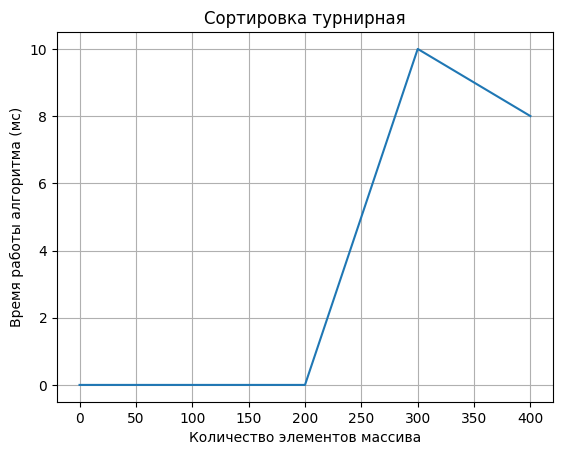

In [77]:
# Турнирная сортировка.

list6 = copy.deepcopy(matrix)
start_time = time.time()
def heapify(arr, num, row):
    largest = row
    left = 2 * row + 1
    right = 2 * row + 2

    if left < num and arr[row] < arr[left]:
        largest = left

    if right < num and arr[largest] < arr[right]:
        largest = right

    if largest != row:
        arr[row], arr[largest] = arr[largest], arr[row]

        heapify(arr, num, largest)

def heapsort(arr):
    num = len(arr)

    for row in range(num // 2, -1, -1):
        heapify(arr, num, row)

    for i in range(num - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)
    
    return arr

for i in range(len(list6)):
    list6[i] = heapsort(list6[i])

print(list6)
print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

x = []
y = []

for n in range(0, 500, 100):
    row = np.random.randint(0, 1000, size=n)
    start_time = time.time()
    heapsort(row)
    time_work = round((time.time() - start_time) * 1000)

    x.append(n)
    y.append(time_work)


plt.title('Сортировка турнирная')
plt.xlabel('Количество элементов массива')
plt.ylabel('Время работы алгоритма (мс)')
plt.grid(True)
plt.plot(x, y)
plt.show()

### Вывод


В данной лабораторной работе мы разобрали 6 алгоритмов сортировок. Самой быстрой оказалась быстрая сортировка и сортировка Шелла, самой медленной - пузырьком.